# Timeseries in pandas
In this notebook
- get data that into a dataframe 
- convert the appropriate column into time-series

[docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#overview)


In [4]:
import pandas as pd

### Getting Data
There is a lot of useful datasets at
datahub.io

I am going to use the link 
https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv

In [5]:
df = pd.read_csv("https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv")
df.head(3)

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
1958-03,1958.2027,315.71,314.44,-1,-9.99,-0.99
1958-04,1958.2877,317.45,315.16,-1,-9.99,-0.99
1958-05,1958.3699,317.51,314.69,-1,-9.99,-0.99


### What the heck!!!??

Because there is a blank column at the end it shifts over
It thinks the first column is an index

In [6]:
fields = ['Date', 'Interpolated']
df = pd.read_csv("https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv", usecols = fields)
df.head(3)

,Date,Interpolated
1958-03,1958.2027,-1
1958-04,1958.2877,-1
1958-05,1958.3699,-1


##### damn still not working, arrrghhhhhhh

Skip first row using skip rows

Adds an index (all pandas dataframes does this) it will be removed later on 

In [7]:
names = ['Date', "DD", "Ave", "Interpolated", "Trend", "Num Days","extra"]
df = pd.read_csv("https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv",header= None, names = names, skiprows=1)
df.head(3)

,Date,DD,Ave,Interpolated,Trend,Num Days,extra
0,1958-03,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958-04,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958-05,1958.3699,317.51,314.69,-1,-9.99,-0.99


In [8]:
df["Date"]

0      1958-03
1      1958-04
2      1958-05
3      1958-06
4      1958-07
        ...   
794    2024-05
795    2024-06
796    2024-07
797    2024-08
798    2024-09
Name: Date, Length: 799, dtype: object

so we will use [to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)


In [9]:
pd.to_datetime(df['Date'])

0     1958-03-01
1     1958-04-01
2     1958-05-01
3     1958-06-01
4     1958-07-01
         ...    
794   2024-05-01
795   2024-06-01
796   2024-07-01
797   2024-08-01
798   2024-09-01
Name: Date, Length: 799, dtype: datetime64[ns]

In [10]:
df["Date"]= pd.to_datetime(df['Date'])

In [11]:
df["Date"]

0     1958-03-01
1     1958-04-01
2     1958-05-01
3     1958-06-01
4     1958-07-01
         ...    
794   2024-05-01
795   2024-06-01
796   2024-07-01
797   2024-08-01
798   2024-09-01
Name: Date, Length: 799, dtype: datetime64[ns]

## Seaborn
is a nice plotting package based on matplot lib

In [12]:
import seaborn as sns

<Axes: xlabel='Date', ylabel='Ave'>

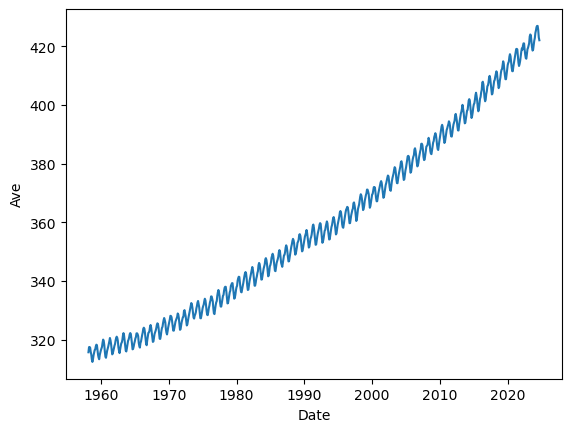

In [13]:
sns.lineplot(data=df, x="Date", y="Ave")

<Axes: xlabel='Date', ylabel='Ave'>

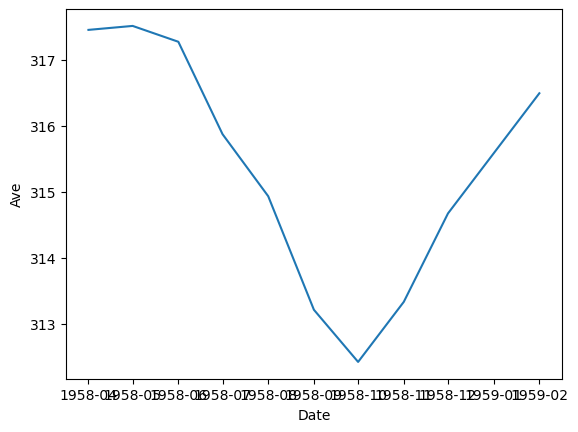

In [14]:
sns.lineplot(data=df.iloc[1:12], x="Date", y="Ave")

<Axes: xlabel='Date', ylabel='Ave'>

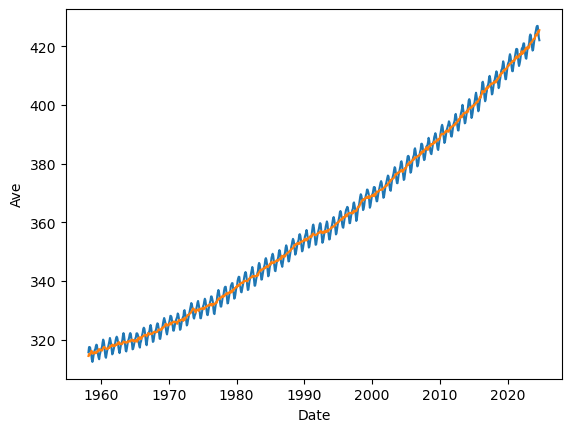

In [12]:
sns.lineplot(data=df, x="Date", y="Ave")
sns.lineplot(data=df, x="Date", y="Interpolated")

## Irish data
Have a look at data.gov.ie
There is lots of data

I am going to look at
Knock airport weather https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv


In [15]:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv")
df.head(3)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


##### Whoops 
we need to ignore the first few rows (this is why it is good to inspect the data)

In [16]:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv", skiprows=19)
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,
1,1996,10,9.7,,,12.5,7.0,,,,,
2,1996,11,5.0,,,7.6,2.5,,,,,


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    338 non-null    int64  
 1   month   338 non-null    int64  
 2   meant   338 non-null    float64
 3   maxtp   338 non-null    object 
 4   mintp   338 non-null    object 
 5   mnmax   338 non-null    float64
 6   mnmin   338 non-null    float64
 7   rain    338 non-null    object 
 8   gmin    338 non-null    object 
 9   wdsp    338 non-null    object 
 10  maxgt   338 non-null    object 
 11  sun     338 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 31.8+ KB


mmmmm the year and month are in different Columns  
(I am not going to dwell on the holes in the data yet, I talked about that two weeks ago)

In [18]:
pd.to_datetime(df[['year', 'month']])

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day] is missing

###### Arrrrgghhhhhhhhh
Ok lets make a column called day

In [19]:
df["day"]=1
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1,1996,10,9.7,,,12.5,7.0,,,,,,1
2,1996,11,5.0,,,7.6,2.5,,,,,,1


In [20]:
df['date']=pd.to_datetime(df[['year', 'month', 'day']])
df['date']

0     1996-08-01
1     1996-10-01
2     1996-11-01
3     1996-12-01
4     1997-01-01
         ...    
333   2024-06-01
334   2024-07-01
335   2024-08-01
336   2024-09-01
337   2024-10-01
Name: date, Length: 338, dtype: datetime64[ns]

<Axes: xlabel='date', ylabel='meant'>

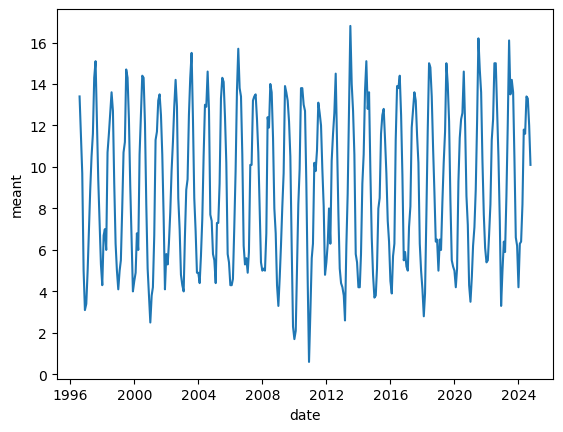

In [21]:
sns.lineplot(data=df, x="date", y="meant")

### setting the index to the datetime
If you would like to do some analysis on the data based on time, you should set the index of the DataFrame to be the date

In [22]:
df.set_index('date', inplace=True)
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
date,,,,,,,,,,,,,
1996-08-01,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1996-10-01,1996,10,9.7,,,12.5,7.0,,,,,,1
1996-11-01,1996,11,5.0,,,7.6,2.5,,,,,,1


<Axes: xlabel='date', ylabel='meant'>

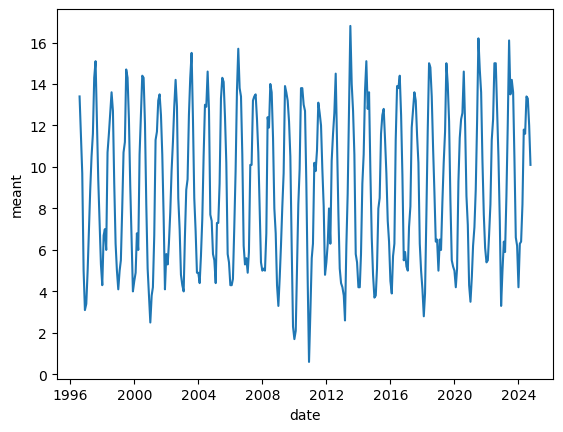

In [23]:
sns.lineplot(data=df, x="date", y="meant")

##### lets look at one year
`loc` gets the rols that match the indexes value

<Axes: xlabel='date', ylabel='meant'>

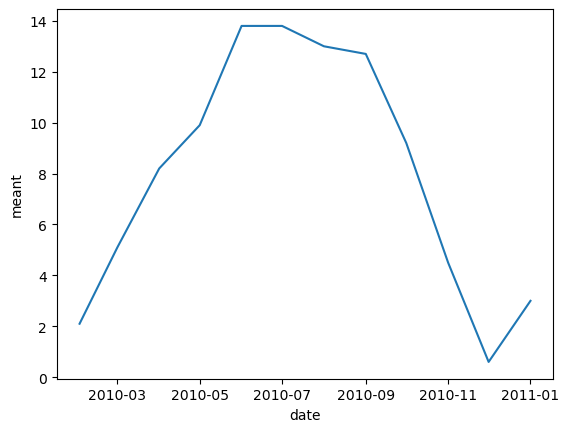

In [ ]:
dateFrom = "2010-01-01 01:00:00"
dateTo = "2011-01-01 01:00:00"
sns.lineplot(data=df.loc[dateFrom:dateTo], x="date", y="meant")

 remeber `iloc` uses the row (or column) number

<Axes: xlabel='date', ylabel='meant'>

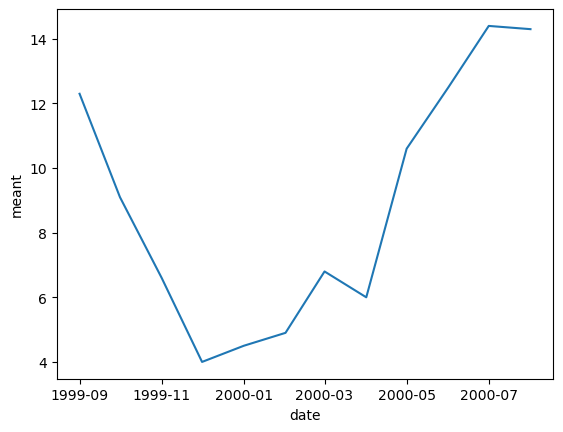

In [ ]:
sns.lineplot(data=df.iloc[36:48], x="date", y="meant")

### Get the mean temperature
ie select the row and Column  
*note* Be careful taking the mean of a mean or percentage, this can cause unsound data

In [1]:
dateFrom = "2010-01-01 01:00:00"
dateTo = "2011-01-01 01:00:00"
df.loc[dateFrom:dateTo]['meant'].mean()

NameError: name 'df' is not defined

## Resample
You can resample the date,  
ie break it up into chunks.  
eg plot the average temperatures each year

[docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling)

In [ ]:
df["meant"].resample("1y").mean()

C:\Users\curleys\AppData\Local\Temp\ipykernel_14620\548764261.py:1: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["meant"].resample("1y").mean()


date
1996-12-31    7.800000
1997-12-31    9.150000
1998-12-31    8.808333
1999-12-31    8.791667
2000-12-31    8.600000
2001-12-31    8.475000
2002-12-31    8.875000
2003-12-31    9.008333
2004-12-31    8.925000
2005-12-31    9.100000
2006-12-31    9.066667
2007-12-31    9.433333
2008-12-31    8.691667
2009-12-31    8.650000
2010-12-31    7.883333
2011-12-31    8.850000
2012-12-31    8.616667
2013-12-31    8.625000
2014-12-31    9.200000
2015-12-31    8.400000
2016-12-31    8.941667
2017-12-31    9.158333
2018-12-31    8.833333
2019-12-31    9.000000
2020-12-31    8.883333
2021-12-31    9.266667
2022-12-31    9.441667
2023-12-31    9.875000
2024-12-31    9.688889
Freq: YE-DEC, Name: meant, dtype: float64

you can use `rolling()` to provide rolling calculations (eg averages)

### Aggregation
`agg()`  
instead of just doing the mean() you can do mulitple operations (even have your own lamba functions)   
[docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#aggregation)


In [ ]:
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
date,,,,,,,,,,,,,
1996-08-01,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1996-10-01,1996,10,9.7,,,12.5,7.0,,,,,,1
1996-11-01,1996,11,5.0,,,7.6,2.5,,,,,,1


In [ ]:
rs =df.resample("1y")  # resamples the entire data frame


C:\Users\curleys\AppData\Local\Temp\ipykernel_14620\518309784.py:1: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  rs =df.resample("1y")  # resamples the entire data frame


In [ ]:
rs.mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
rs['meant'].agg(["mean", "std"])

,mean,std
date,,
1996-12-31,7.800000,4.651165
1997-12-31,9.150000,3.719360
1998-12-31,8.808333,3.312911
1999-12-31,8.791667,3.846003
2000-12-31,8.600000,3.971947
2001-12-31,8.475000,4.107228
2002-12-31,8.875000,3.265557
2003-12-31,9.008333,3.907675
2004-12-31,8.925000,3.618670


### Conslusion
We are only scratching the surface here.   
There is lots more for you to explore:
- The Documentation
- search for it
- co-pilot or chat-gpt can also give you starts

### References
- https://realpython.com/pandas-dataframe/#working-with-time-series
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#overview
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime